### MATH2504 S2, 2023, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Molly O'Toole

Student #1 ID: 47524220

Student #2 name: Andrea Brouwers

Student #2 ID: 47497155

GitHub repo: 

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q13)

## 13a:

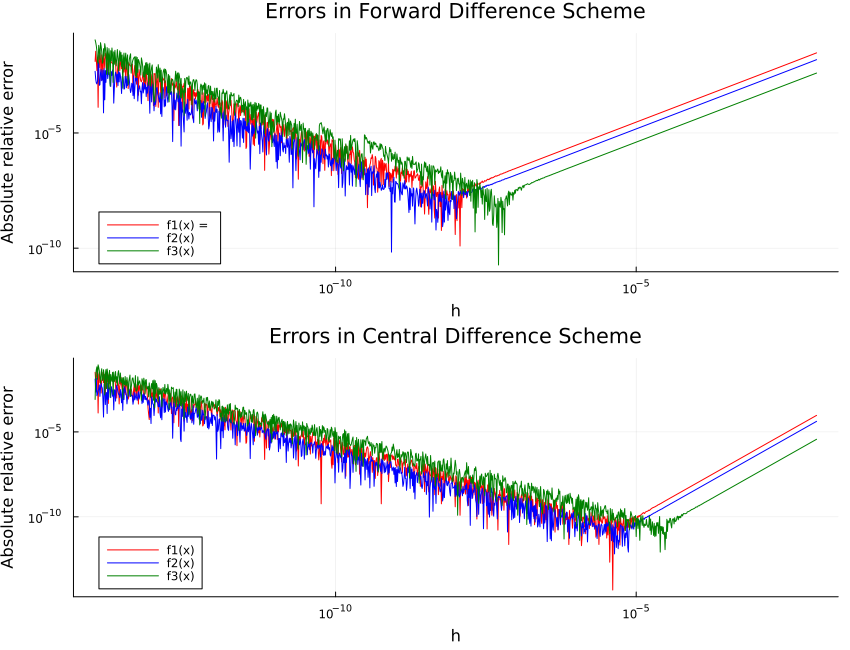

In [286]:
using Plots

#define the forward difference and central difference schemes (from lectures)
diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x + (h/2)) - f(x - (h/2)))/h

#define each function and its derivative
f1(x) = cos(x^2)
f1_der(x) = -2*x*sin(x^2)
f2(x) = exp(x^2)
f2_der(x) = 2*x*exp(x^2)
f3(x) = (atan(x))/(1 + exp(-4x^2)) 
f3_der(x) = (1 + exp(-4x^2) + (8*exp(-4x^2) * atan(x) * (x^3 + x)))/((1+exp(-4x^2))^2 * (x^2 + 1))

#define x values for each function being tested
x1, x2, x3 = 1/2, 1, 2

#set h range
h_range = 10 .^ (-14:0.01:-2)

#errors for f1 function (forward and central)
errs11 = [abs(diff_forward(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]
errs12 = [abs(diff_central(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]

#errors for f2 function (forward and central)
errs21 = [abs(diff_forward(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]
errs22 = [abs(diff_central(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]

#errors for f3 function (forward and central)
errs31 = [abs(diff_forward(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]
errs32 = [abs(diff_central(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]

#plot for errors in forward difference scheme
p1 = plot(h_range,[errs11 errs21 errs31 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["f1(x) = " "f2(x)" "f3(x)"], c = [:red :blue :green], legend = :bottomright, title = "Errors in Forward Difference Scheme")

#plot for errors in central difference scheme
p2 = plot(h_range,[errs12 errs22 errs32 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["f1(x)" "f2(x)" "f3(x)"], c = [:red :blue :green], legend = :bottomright, title = "Errors in Central Difference Scheme")

#display both Plots
display(plot(p1, p2, size=(850,650), layout = (2,1), legend=:bottomleft))

errs1 = [errs11, errs21, errs31] #define forward difference scheme errors
errs2 = [errs12, errs22, errs32] #define central difference scheme errors

println("Error for Forward Difference Scheme")
for i in 1:3 
    optimal_index_forward = argmin(errs1[i])
    optimal_h_forward = h_range[optimal_index_forward]
    println("The optimal h for f$(i) is $(optimal_h_forward)")
end 

println("")

println("Error for Central Difference Scheme")
for i in 1:3
    optimal_index_central = argmin(errs2[i])
    optimal_h_central = h_range[optimal_index_central]
    println("The optimal h for f$(i) is $(optimal_h_central)")
end


## 13b:

Firstly, the Jacobian is defined to be a maxtrix of the partial derivatives of S($z$) with dimension K x K. Using the forward difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z+he_j)-f_i(z)}{h}$$ where $e_j$ is a unit vector in the $j^{th}$ direction. This requires us to evaluate the softmax function twice, once for the vector $z$, and again for the vector $z + he_j$. If every partial derivative in the Jacobian is calculated this way, we end up with $2K^2$ evaluations of the softmax function, because there are K rows and K columns, with each element evaluated twice. 

Similarly, for the central difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z + \frac{h}{2}e_j) - f_i(z - \frac{h}{2}e_j)}{h} $$ where $e_j$ is a unit vector in the $j^{th}$ direction. Like before, we need to evaluate the softmax function twice at each partial derivative, once for $ z + \frac{h}{2} e_j$ and once for $ z - \frac{h}{2} e_j$. We therefore have that the number of softmax evaluations for the central difference scheme is also $2K^2$.

## 13c:

In [282]:
using LinearAlgebra, Plots

#define softmax function
function softmax(z)
    return exp.(z) / sum(exp.(z))
end

#define actual softmax jacobian
function jacobian(z)
    k = length(z)
    sm = softmax(z)
    J = zeros(k, k)
    for i in 1:k
        for j in 1:k
            J[i,j] = sm[i] * (i == j ? 1 - sm[i] : -sm[j])
        end
    end 
    return J
end

# forward difference scheme for softmax function
function softmax_diff_forward(z, h)
    k = length(z)
    sm = softmax(z)
    J = zeros(k,k)
    for j in 1:k 
        diff_z = copy(z)
        diff_z[j] += h
        J = (softmax(diff_z) .- sm) / h
    end
    return J
end

# central difference scheme for softmax function
function softmax_diff_central(z, h)
    k = length(z)
    sm = softmax(z)
    J = zeros(k,k)
    for j in 1:k
        diff_z_positive = copy(z)
        diff_z_negative = copy(z)
        diff_z_positive[j] += h/2
        diff_z_negative[j] -= h/2
        J = (softmax(diff_z_positive) .- softmax(diff_z_negative)) / h
    end
    return J
end

#find error in actual jacobian and predicted jacobian for forward difference scheme
function error_jacobian_forward(z, h)
    error1 = norm(jacobian(z) - softmax_diff_forward(z,h))
    return error1
end

#find error in actual jacobian and predicted jacobian for central difference scheme
function error_jacobian_central(z, h)
    error2 = norm(jacobian(z) - softmax_diff_central(z,h))
    return error2
end

#define k values, h values, and empty arrays for forward and central errors
k_values = [10, 20, 100]
h_range = 10 .^ (-14:0.01:-2)
error_forward = [[],[],[]]
error_central = [[],[],[]]
labels = ["K = 10", "K = 20", "K = 100"]

#iterate through k values to find errors
for (index, k) in enumerate(k_values)
    z = [i^(1/3) for i in 1:k]
    J_explicit = jacobian(z)

    push!(error_forward[index], error_jacobian_forward.((z,), h_range))
    push!(error_central[index], error_jacobian_central.((z,), h_range))
end 

#plot error of jacobian for both forward and central difference schemes
p1 = plot(h_range, [for_error[1], for_error[2], for_error[3]], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["K = 10" "K = 20" "K=100"], c = [:red], legend = :bottomright, title = "Forward Difference Scheme for Softmax Function")

p2 = plot(h_range, [cen_error[1], cen_error[2], cen_error[3]], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["K = 10" "K = 20" "K=100"], c = [:blue], legend = :bottomright, title = "Central Difference Scheme for Softmax Function")

display(plot(p1, p2, size=(850,650), layout = (2,1), legend=:bottomleft)) 

DimensionMismatch: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(10), Base.OneTo(10)), must have singleton at dim 2

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [59]:
using LinearAlgebra, Plots


function softmax(z)
    e_z = exp.(z)
    return e_z / sum(e_z)
end


function jacobian_softmax(z)
    K = length(z)
    S = softmax(z)
    J = zeros(K, K)
    for i in 1:K
        for j in 1:K
            J[i, j] = S[i] * (i == j ? 1 .- S[j] : -S[j])
        end
    end
    return J
end

# Numerical derivative using forward difference
function softmax_diff_forward(f, x; h = sqrt(eps()))
    k = length(z)
    sm = softmax(z)
    J = zeros(K,K)
    for j in 1:k 
        diff_z = copy(z)
        diff_z[j] += h
    end
    return (softmax(diff_z) - s) / h
end

# Numerical derivative using central difference
function softmax_diff_central(f, x; h = sqrt(eps()))
    k = length(z)
    sm = softmax(z)
    J = zeros(K,K)
    for j in 1:k
        diff_z_positive = copy(z)
        diff_z_negative = copy(z)
        diff_z_positive[j] += h/2
        diff_z_negative[j] -= h/2
    end
    return (softmax(diff_z_positive) - softmax(diff_z_negative)) / h
end


function calculate_error(numerical, explicit)
    return sqrt(sum(abs2, numerical .- explicit))
end


K_values = [10, 20, 100]

error_forward = [[],[],[]]
error_central = [[],[],[]]


for K in K_values
    z = [i.^(1/3) for i in 1:K]
    J_explicit = jacobian_softmax(z)

    h_range =  10 .^ (-14:0.01:-2) 
    err_forward = []
    err_central = []


    for h in h_range
        J_numerical_forward = zeros(K, K)
        J_numerical_central = zeros(K, K)

        for j in 1:K
            J_numerical_forward[:, j] = diff_forward(softmax, z)[:, j]
            J_numerical_central[:, j] = diff_central(softmax, z)[:, j]
        end

        push!(err_forward, calculate_error(J_numerical_forward, J_explicit))
        push!(err_central, calculate_error(J_numerical_central, J_explicit))
    end

    push!(error_forward, err_forward)
    push!(error_central, err_central)
end


labels = ["K = 10", "K = 20", "K = 100"]
plot(h_range, error_forward[1], label=labels[1], xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", title="Forward Difference Scheme Error")
plot!(h_range, error_forward[2], label=labels[2])
plot!(h_range, error_forward[3], label=labels[3])

plot(h_range, error_central[1], label=labels[1], xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", title="Central Difference Scheme Error")
plot!(h_range, error_central[2], label=labels[2])
plot!(h_range, error_central[3], label=labels[3])

BoundsError: BoundsError: attempt to access 10-element Vector{Float64} at index [1:10, 2]

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q14)

In [288]:
using LinearAlgebra, StatsBase

#function for Probability matrix
function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

#function for structured π
structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;
    
#METHOD 1
function method_one(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    #We want to solve π(I - P) = 0 where A = I - P and b = 0 
    P = structured_P(L, p=p, r=r)
    A = I - P
    b = zeros(L)
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end 

#METHOD 2
function method_two(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    limit_π = vec(initial * P^n)        
    return limit_π
end 

#METHOD 3
function method_three(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    P_eigenvalues = eigvals(P)
    P_eigenvectors = eigvecs(P)
    _, eigval_max = findmax(P_eigenvalues)
    eigvec_max = P_eigenvectors[:, eigval_max]
    return eigvec_max/sum(eigvec_max)        
end 

#METHOD 4
function method_four(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    cols = size(P)[2]
    markov_states = [i for i in 1:cols]
    x0 = sample(markov_states, n, replace = true)
    indicator = zeros(cols)
    for i in 1:cols
        for j in 1:n 
            (x0[j] == i) ? indicator[i] += 1 : indicator[i] += 0
        end
    end
    limit_π = (1/n) * indicator
    return limit_π
end

#function for euclidean norm difference
function norm_difference(method_function, L::Int, p::Float64 = 0.45, r::Float64 = 0.01)
    exact_π = structured_π(L, p=p, r=r)
    norm_π = method_function(L, p=p, r=r)
    return norm(norm_π - exact_π)
end

#list of L values and empty arrays for the norm error of each method
L_list = [2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000]
norms_method_one = []
norms_method_two = []
norms_method_three = []
norms_method_four = []

#iterating through the values of L for each method, calculating the norm for the method and the structured function
for L in L_list
    append!(norms_method_one, norm_difference(method_one, L))
    append!(norms_method_two, norm_difference(method_two, L))
    append!(norms_method_three, norm_difference(method_three, L))
    append!(norms_method_four, norm_difference(method_four, L))
end

#plotting each method
plot(L_list, norms_method_one, label="Method 1")
plot!(L_list, norms_method_two, label="Method 2")
plot!(L_list, norms_method_three, label="Method 3")
plot!(L_list, norms_method_four, label="Method 4", legend=:bottomright)
xlabel!("L")
ylabel!("Norm Difference")
title!("Accuracy Comparison of Methods")


DimensionMismatch: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(4),), b has dims (Base.OneTo(2),), mismatch at 1

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [222]:
using LinearAlgebra, StatsBase

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;
    

function method_one(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    #We want to solve π(I - P) = 0 where A = I - P and b = 0 
    P = structured_P(L, p=p, r=r)
    A = I - P
    b = zeros(L)
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end 


function method_two(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    limit_π = vec(initial * P^n)        
    return limit_π
end 

     

function method_three(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    P_eigenvalues = eigvals(P)
    P_eigenvectors = eigvecs(P)
    _, eigval_max = findmax(P_eigenvalues)
    eigvec_max = P_eigenvectors[:, eigval_max]
    return eigvec_max/sum(eigvec_max)        
end 



function method_four(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    cols = size(P)[2]
    markov_states = [i for i in 1:cols]
    x0 = sample(markov_states, n, replace = true)
    indicator = zeros(cols)
    for i in 1:cols
        for j in 1:n 
            (x0[j] == i) ? indicator[i] += 1 : indicator[i] += 0
        end
    end
    limit_π = (1/n) * indicator
    return limit_π
end




method_four (generic function with 1 method)

In [135]:
P = structured_P(6)

6×6 Matrix{Float64}:
 0.55  0.45  0.0   0.0   0.0   0.0
 0.54  0.01  0.45  0.0   0.0   0.0
 0.0   0.54  0.01  0.45  0.0   0.0
 0.0   0.0   0.54  0.01  0.45  0.0
 0.0   0.0   0.0   0.54  0.01  0.45
 0.0   0.0   0.0   0.0   0.54  0.46

In [230]:
P = structured_P(100)

π = method_two(100) 
@show π
@show sum(π) ≈ 1.0
π

10000-element Vector{Float64}:
 0.16666666867997398
 0.166666668679974
 0.16666666867997404
 0.16666666867997407
 0.16666666867997404
 0.16666666867997404
 0.16666666867997398
 0.166666668679974
 0.16666666867997398
 0.166666668679974
 ⋮
 2.414934723654748e-9
 2.414934723654748e-9
 2.4149347236547474e-9
 2.414934723654747e-9
 2.414934723654748e-9
 2.4149347236547466e-9
 2.4149347236547474e-9
 2.4149347236547466e-9
 2.414934723654746e-9

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q15)

## 15a:

In [284]:
### Answer 15c here (in place of this comment)

## 15b:

In [ ]:
### Answer 15b here (in place of this comment)

## 15c:

In [ ]:
### Answer 15c here (in place of this comment)

## 15d:

In [ ]:
### Answer 15d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q16)

## 16a:

In [ ]:
### Answer 16a here (in place of this comment)

## 16b:

In [ ]:
### Answer 16b here (in place of this comment)

## 16c:

In [ ]:
### Answer 16c here (in place of this comment)

## 16d:

In [ ]:
### Answer 16d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q17)

In [ ]:
# Convert this cell to a markdown cell and answer question 17 here in paragraph form.